In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.context_data_csv import ContextDataCSV
from utils.matrix_optimizer import MatrixOptimizer
import utils.sulfur.constant as const

from oasis.functions import deconvolve

/app/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
all_shock_cells = {
    'ID181106CreA': ['C261', 'C305', 'C347', 'C349', 'C351', 'C371'],
    'ID181106CreB': ['C058', 'C062', 'C089', 'C126', 'C138', 'C172'],
    'ID181106CreC': ['C017', 'C051', 'C065', 'C112', 'C117', 'C203', 'C214', 'C227'],
    'ID181106CreG': ['C127', 'C239', 'C270', 'C323', 'C347', 'C350', 'C399', 'C402'],
    'ID181106CreH': ['C164', 'C180', 'C184', 'C206', 'C243', 'C253', 'C298', 'C327', 'C351', 'C534', 'C542'],
    'ID181106CreI': ['C136', 'C197', 'C273', 'C292', 'C294', 'C306', 'C333'],
    'ID181106CreK': ['C083', 'C088', 'C100', 'C118', 'C137', 'C149', 'C203', 'C390'],
    'ID181106CreL': ['C200'],
    'ID181106CreN': ['C199', 'C255', 'C258', 'C273', 'C334'],
    'ID181106CreQ': ['C235', 'C393']
}

In [3]:
index = const.ANIMAL_NAMES
columns = const.CONTEXTS
event_rate_for_1sd_shock_cells = pd.DataFrame(index=index, columns=columns)

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    for context_name in const.CONTEXTS:
        print('context: %s' % context_name)
        
        context_data = ContextDataCSV(animal_name, context_name)
        df = context_data.data_frame
        df = MatrixOptimizer(df).divide_sd()
        
        seconds = len(df) / 10.0
        
        event_rates = np.array([])
        shock_cells_df = df.loc[:, shock_cells]
        for cell_name, values in shock_cells_df.iteritems():
            if values.isnull().all() or (values == 0).all():
                print('%s is nan' % cell_name)
                continue
                
            values.fillna(0.0, inplace=True)
            _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
            
            event_rate = len(spikes[spikes >= 0.05]) / seconds
            event_rates = np.append(event_rates, event_rate)
            
        event_rate_for_1sd_shock_cells.loc[animal_name, context_name] = np.mean(event_rates)
        
event_rate_for_1sd_shock_cells

animal name: ID181106CreA
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C347 is nan
context: A2_1
C347 is nan
context: A2_2
C347 is nan
context: A3_1
C347 is nan
context: A3_2
C347 is nan
context: B1
C347 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C261 is nan
C347 is nan
C371 is nan
context: A5
C261 is nan
C347 is nan
C371 is nan
context: B2
C261 is nan
C347 is nan
C371 is nan
animal name: ID181106CreB
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C126 is nan
context: A2_1
C126 is nan
context: A2_2
C126 is nan
context: A3_1
C126 is nan
context: A3_2
C126 is nan
context: B1
C126 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C058 is nan
C126 is nan
context: A5
C058 is nan
C126 is nan
context: B2
C058 is nan
C126 is nan
animal name: ID181106CreC
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C051 is nan
C065 is nan
context: A2_1
C051 i

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A2_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A3_1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A3_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: B1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: HC4


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


context: A4preES
context: A4postES
context: HC5
context: HC6
context: A5
context: B2
animal name: ID181106CreN
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C199 is nan
context: A2_1
C199 is nan
context: A2_2
C199 is nan
context: A3_1
C199 is nan
context: A3_2
C199 is nan
context: B1
C199 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C199 is nan
C273 is nan
context: A5
C199 is nan
C273 is nan
context: B2
C199 is nan
C273 is nan
animal name: ID181106CreQ
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C393 is nan
context: A2_1
C393 is nan
context: A2_2
C393 is nan
context: A3_1
C393 is nan
context: A3_2
C393 is nan
context: B1
C393 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
context: A5
context: B2


,HC1,A1preES,A1postES,HC2,HC3,A2_1,A2_2,A3_1,A3_2,B1,HC4,A4preES,A4postES,HC5,HC6,A5,B2
ID181106CreA,1.221768,1.432222,1.715284,0.591653,0.688013,1.074082,1.456367,0.585184,1.278604,1.425339,0.675233,1.017778,1.629427,0.339062,0.379705,2.258134,1.08705
ID181106CreB,1.117294,1.15,1.558797,1.079924,0.917662,1.490877,1.639302,1.383821,1.085326,1.409179,0.978451,1.118889,1.63856,1.230152,0.55983,1.646736,1.741273
ID181106CreC,1.121931,1.466667,1.922901,1.230974,0.835789,0.962483,1.298212,1.155382,1.628959,1.11991,0.656915,1.958333,2.008094,1.170213,0.89993,1.761012,1.398098
ID181106CreG,0.803644,1.24375,1.535955,0.38643,0.3759,0.842476,1.186813,0.681688,0.806076,0.87395,0.323907,0.7025,0.986092,0.334547,0.414552,1.729557,0.890837
ID181106CreH,0.593243,1.28697,1.547195,0.542181,0.988978,0.598483,1.098901,0.835165,1.47813,0.998168,0.791381,1.446061,1.507003,0.596884,0.778583,1.500139,1.189399
ID181106CreI,0.823375,0.771429,1.057912,1.568389,0.818003,0.476588,0.921138,0.561442,1.2883,0.88106,1.006711,0.8,0.938273,0.988237,0.499918,1.021978,0.794441
ID181106CreK,0.805165,1.6,1.698382,1.400188,0.724341,1.284531,1.230877,1.203561,1.636501,1.19694,0.819149,1.962917,1.413589,1.06117,0.607574,1.185089,0.770847
ID181106CreL,1.400262,0.776667,0.820419,1.546898,NaN,NaN,NaN,NaN,NaN,NaN,1.358651,0.583333,2.101185,1.021277,0.674304,1.302521,0.723982
ID181106CreN,0.73126,1.856,1.777575,1.744681,1.234654,0.907617,0.758727,1.068641,0.714286,0.975275,1.201309,1.758667,2.143183,0.811262,0.36849,2.034044,1.877828
ID181106CreQ,1.088558,1.266667,1.709986,1.650843,1.365199,0.663882,1.784098,1.314575,2.032967,1.102133,0.722586,2.066667,1.032361,1.269231,0.302782,0.927602,0.496122


In [4]:
event_rate_for_1sd_shock_cells.mean()

HC1         0.970650
A1preES     1.285037
A1postES    1.534441
HC2         1.174216
HC3         0.883171
A2_1        0.922336
A2_2        1.263826
A3_1        0.976607
A3_2        1.327683
B1          1.109106
HC4         0.853429
A4preES     1.341514
A4postES    1.539777
HC5         0.882204
HC6         0.548567
A5          1.536681
B2          1.096988
dtype: float64

In [5]:
all_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/all_event_rates_threshold005.csv', index_col=[0], header=[0])
engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/engram_event_rates_threshold005.csv', index_col=[0], header=[0])
non_engram_event_rate_df = pd.read_csv('./resources/event_rates/oasis_by_cells/non_engram_event_rates_threshold005.csv', index_col=[0], header=[0])

In [6]:
all_event_rate_df.mean()

HC1         0.779862
A1preES     1.024442
A1postES    1.140911
HC2         0.930113
HC3         0.770350
A2_1        0.870987
A2_2        1.097369
A3_1        0.858577
A3_2        1.115657
B1          1.016101
HC4         0.736267
A4preES     1.114329
A4postES    1.151813
HC5         0.848619
HC6         0.721265
A5          1.230537
B2          0.930522
dtype: float64

In [7]:
engram_event_rate_df.mean()

HC1         0.596329
A1preES     0.902434
A1postES    1.038283
HC2         0.764969
HC3         0.615702
A2_1        0.717011
A2_2        0.933605
A3_1        0.683944
A3_2        0.957210
B1          0.939976
HC4         0.574539
A4preES     1.008415
A4postES    1.055929
HC5         0.676264
HC6         0.594458
A5          1.196576
B2          0.888129
dtype: float64

In [8]:
non_engram_event_rate_df.mean()

HC1         0.797818
A1preES     1.035340
A1postES    1.147229
HC2         0.943474
HC3         0.783373
A2_1        0.884986
A2_2        1.111690
A3_1        0.874525
A3_2        1.128298
B1          1.018655
HC4         0.749621
A4preES     1.126498
A4postES    1.161931
HC5         0.862979
HC6         0.734297
A5          1.234523
B2          0.934183
dtype: float64

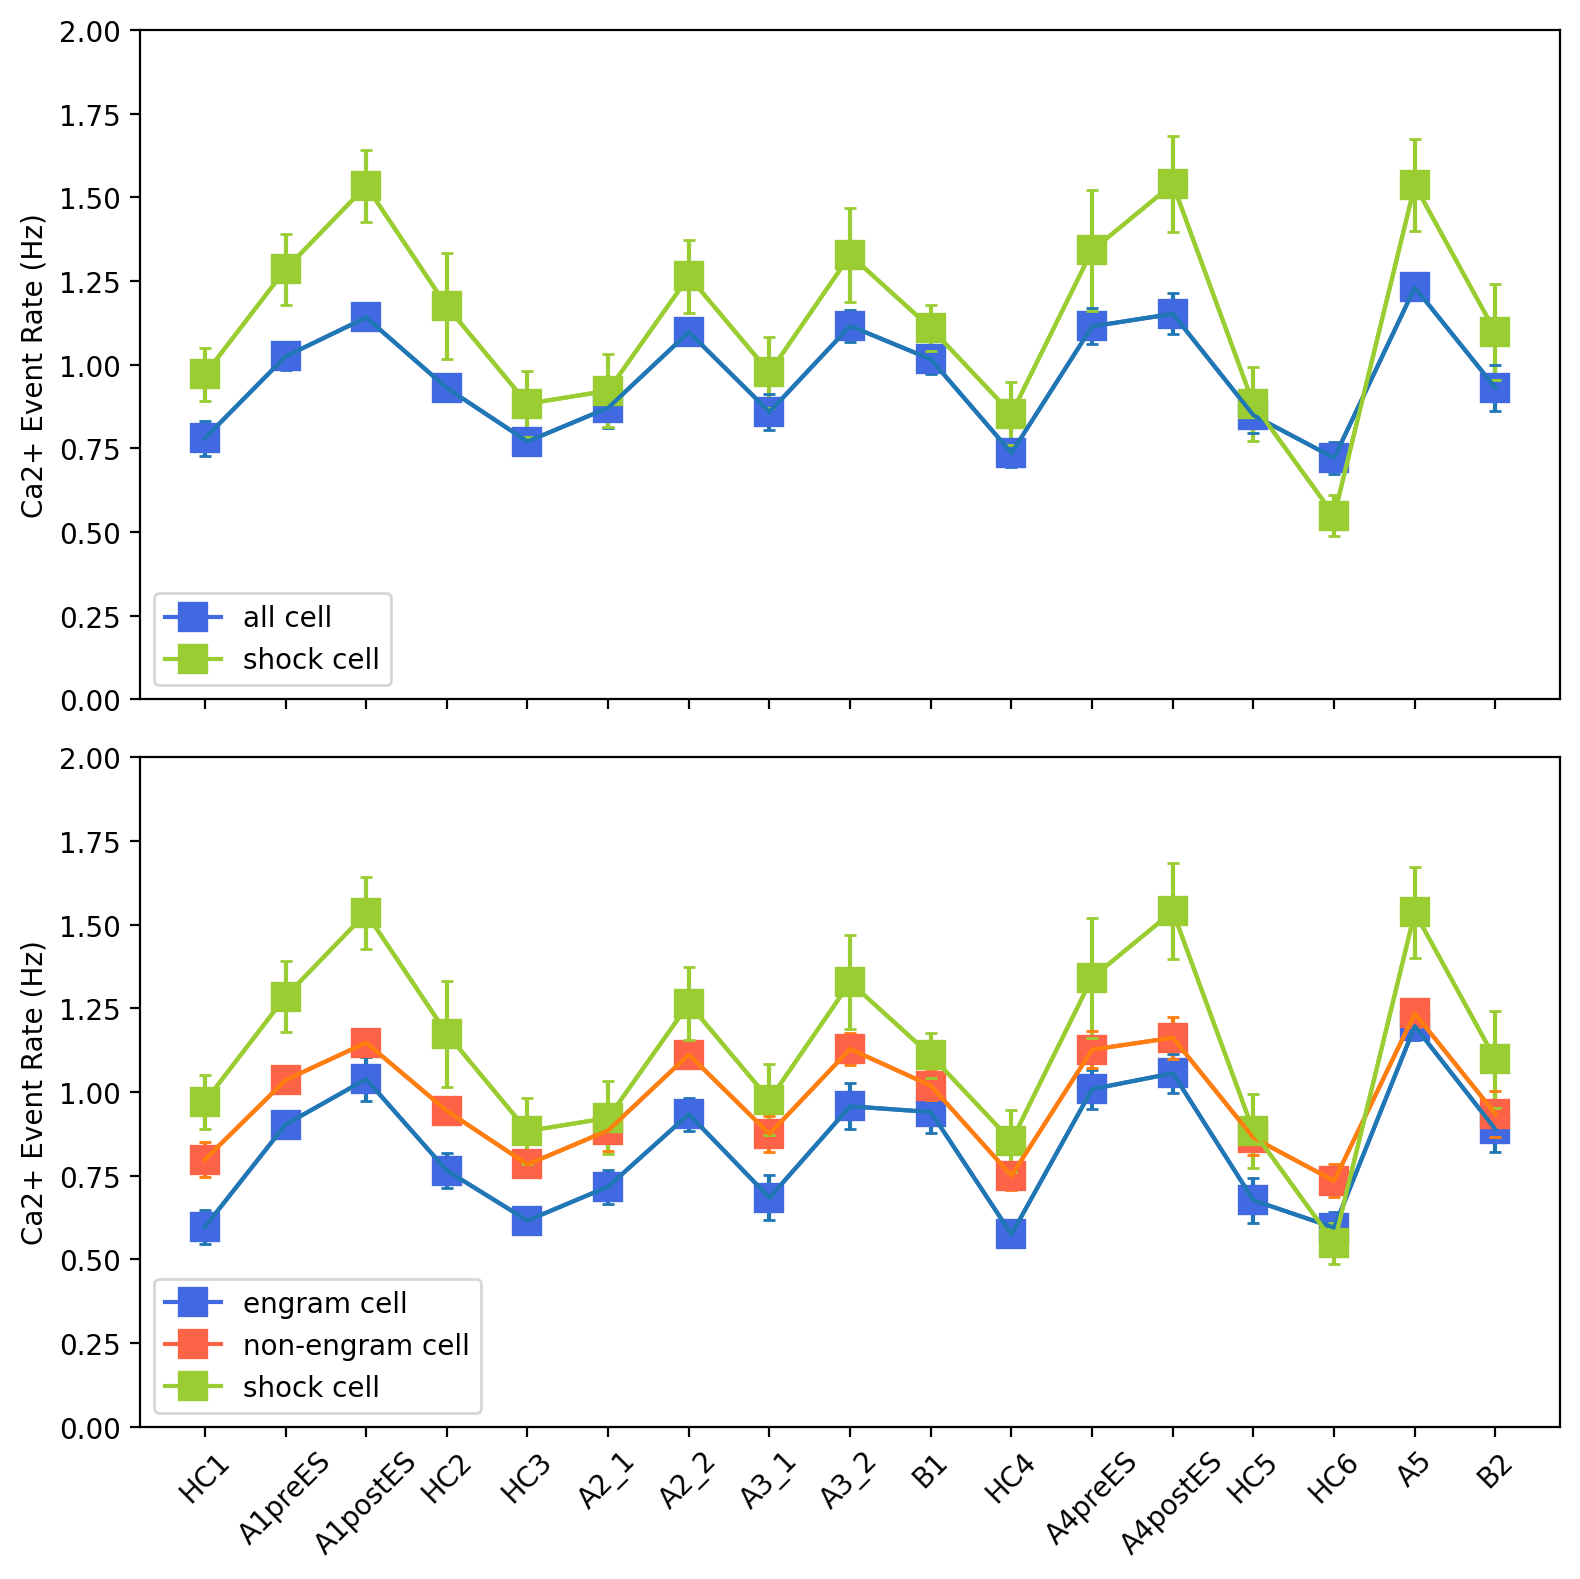

In [9]:
x = all_event_rate_df.columns
y = all_event_rate_df.mean()
error = all_event_rate_df.sem()

engram_x = engram_event_rate_df.columns
engram_y = engram_event_rate_df.mean()
engram_err = engram_event_rate_df.sem()

non_engram_x = non_engram_event_rate_df.columns
non_engram_y = non_engram_event_rate_df.mean()
non_engram_err = non_engram_event_rate_df.sem()

shock_cell_x = event_rate_for_1sd_shock_cells.columns
shock_cell_y = event_rate_for_1sd_shock_cells.mean()
shock_cell_err = event_rate_for_1sd_shock_cells.sem()

fig, axes = plt.subplots(2, figsize=(8, 8), dpi=200, tight_layout=True, sharex='all')

axes[0].errorbar(x, y, yerr=error, capsize=2)
axes[0].plot(x, y, marker="s", markersize=8, markeredgewidth=3, label='all cell', color='royalblue')

axes[0].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[0].plot(shock_cell_x, shock_cell_y, marker="s", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[0].set_ylim(0, 2.0)
axes[0].set_ylabel('Ca2+ Event Rate (Hz)')
axes[0].legend(loc='lower left')
#aix[0].set_title('Ca2+ event rates (threshold: 0.05)')

axes[1].errorbar(engram_x, engram_y, yerr=engram_err, capsize=2)
axes[1].plot(engram_x, engram_y, marker="s", markersize=8, markeredgewidth=3, label='engram cell', color='royalblue')

axes[1].errorbar(non_engram_x, non_engram_y, yerr=non_engram_err, capsize=2)
axes[1].plot(non_engram_x, non_engram_y, marker="s", markersize=8, markeredgewidth=3, label='non-engram cell', color='tomato')

axes[1].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[1].plot(shock_cell_x, shock_cell_y, marker="s", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[1].set_ylim(0, 2.0)
axes[1].set_ylabel('Ca2+ Event Rate (Hz)')
axes[1].legend(loc='lower left')

plt.xticks(rotation=45)

plt.show()

In [10]:
all_shock_cells = {
    'ID181106CreA': ['C261', 'C305', 'C347', 'C349', 'C351'],
    'ID181106CreB': ['C058', 'C089', 'C126'],
    'ID181106CreC': ['C017', 'C065', 'C112', 'C117', 'C203', 'C227'],
    'ID181106CreG': ['C127', 'C239', 'C323', 'C347', 'C350', 'C399', 'C402'],
    'ID181106CreH': ['C164', 'C180', 'C184', 'C243', 'C253', 'C298', 'C327', 'C351', 'C534', 'C542'],
    'ID181106CreI': ['C136', 'C197', 'C273', 'C292', 'C294', 'C306', 'C333'],
    'ID181106CreK': ['C083', 'C088', 'C100', 'C149', 'C390'],
    'ID181106CreL': ['C200'],
    'ID181106CreN': ['C199', 'C255', 'C258', 'C273'],
    'ID181106CreQ': ['C393']
}

In [11]:
index = const.ANIMAL_NAMES
columns = const.CONTEXTS
event_rate_for_2sd_shock_cells = pd.DataFrame(index=index, columns=columns)

for animal_name in const.ANIMAL_NAMES:
    print('animal name: %s' % animal_name)
    
    shock_cells = all_shock_cells[animal_name]
    
    for context_name in const.CONTEXTS:
        print('context: %s' % context_name)
        
        context_data = ContextDataCSV(animal_name, context_name)
        df = context_data.data_frame
        df = MatrixOptimizer(df).divide_sd()
        
        seconds = len(df) / 10.0
        
        event_rates = np.array([])
        shock_cells_df = df.loc[:, shock_cells]
        for cell_name, values in shock_cells_df.iteritems():
            if values.isnull().all() or (values == 0).all():
                print('%s is nan' % cell_name)
                continue
                
            values.fillna(0.0, inplace=True)
            _c, spikes, _b, _g, _lam = deconvolve(values.to_numpy(), g=(None, None), penalty=1)
            
            event_rate = len(spikes[spikes >= 0.05]) / seconds
            event_rates = np.append(event_rates, event_rate)
            
        event_rate_for_2sd_shock_cells.loc[animal_name, context_name] = np.mean(event_rates)
        
event_rate_for_2sd_shock_cells

animal name: ID181106CreA
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C347 is nan
context: A2_1
C347 is nan
context: A2_2
C347 is nan
context: A3_1
C347 is nan
context: A3_2
C347 is nan
context: B1
C347 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C261 is nan
C347 is nan
context: A5
C261 is nan
C347 is nan
context: B2
C261 is nan
C347 is nan
animal name: ID181106CreB
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C126 is nan
context: A2_1
C126 is nan
context: A2_2
C126 is nan
context: A3_1
C126 is nan
context: A3_2
C126 is nan
context: B1
C126 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C058 is nan
C126 is nan
context: A5
C058 is nan
C126 is nan
context: B2
C058 is nan
C126 is nan
animal name: ID181106CreC
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C065 is nan
context: A2_1
C065 is nan
context: A2_2
C065 is nan
context: A3_1
C0

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A2_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A3_1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: A3_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: B1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C200 is nan
context: HC4


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


context: A4preES
context: A4postES
context: HC5
context: HC6
context: A5
context: B2
animal name: ID181106CreN
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C199 is nan
context: A2_1
C199 is nan
context: A2_2
C199 is nan
context: A3_1
C199 is nan
context: A3_2
C199 is nan
context: B1
C199 is nan
context: HC4
context: A4preES
context: A4postES
context: HC5
context: HC6
C199 is nan
C273 is nan
context: A5
C199 is nan
C273 is nan
context: B2
C199 is nan
C273 is nan
animal name: ID181106CreQ
context: HC1
context: A1preES
context: A1postES
context: HC2
context: HC3
C393 is nan
context: A2_1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C393 is nan
context: A2_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C393 is nan
context: A3_1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C393 is nan
context: A3_2


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C393 is nan
context: B1


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


C393 is nan
context: HC4


/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


context: A4preES
context: A4postES
context: HC5
context: HC6
context: A5
context: B2


,HC1,A1preES,A1postES,HC2,HC3,A2_1,A2_2,A3_1,A3_2,B1,HC4,A4preES,A4postES,HC5,HC6,A5,B2
ID181106CreA,1.397709,1.423333,1.756609,0.666121,0.832923,1.114805,1.548966,0.655913,1.485941,1.565126,0.788672,1.179333,1.901505,0.392799,0.379705,2.258134,1.08705
ID181106CreB,1.380251,1.478889,1.738074,1.160938,0.867572,1.560783,1.57563,1.286546,1.157078,1.308985,1.421167,1.0,1.871771,1.547989,0.566377,2.488688,1.777634
ID181106CreC,1.092744,1.488333,2.162409,1.172941,0.805174,1.113651,1.395604,1.21851,1.670976,1.197802,0.69449,2.155,2.086183,1.152755,0.894272,1.984486,1.664512
ID181106CreG,0.816426,1.270476,1.445265,0.379573,0.3759,0.842476,1.186813,0.681688,0.806076,0.87395,0.344924,0.750476,0.916553,0.345392,0.422795,1.634038,0.890202
ID181106CreH,0.634456,1.293667,1.597995,0.543208,1.11082,0.572214,1.240465,0.882612,1.688429,1.123465,0.821084,1.526333,1.574294,0.618759,0.853519,1.717841,1.312756
ID181106CreI,0.823375,0.771429,1.057912,1.568389,0.818003,0.476588,0.921138,0.561442,1.2883,0.88106,1.006711,0.8,0.938273,0.988237,0.499918,1.021978,0.794441
ID181106CreK,0.873465,1.506667,2.072926,1.659191,0.701424,1.347549,1.216871,1.216476,1.980446,1.209599,0.900491,2.094,1.445508,1.183633,0.588476,1.325145,0.649644
ID181106CreL,1.400262,0.776667,0.820419,1.546898,NaN,NaN,NaN,NaN,NaN,NaN,1.358651,0.583333,2.101185,1.021277,0.674304,1.302521,0.723982
ID181106CreN,0.886661,1.864167,1.876709,1.514321,0.889944,1.156298,0.567766,0.816297,0.372764,1.000862,1.089198,1.719167,2.212722,0.882305,0.438913,1.797027,1.840659
ID181106CreQ,0.671141,1.253333,1.878705,1.479784,NaN,NaN,NaN,NaN,NaN,NaN,0.494272,1.93,0.742935,1.412439,0.214403,1.580478,0.465417


<ipython-input-22-0c5fabb16888>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(x, rotation=45)
<ipython-input-22-0c5fabb16888>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(x, rotation=45)
<ipython-input-22-0c5fabb16888>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(x, rotation=45)


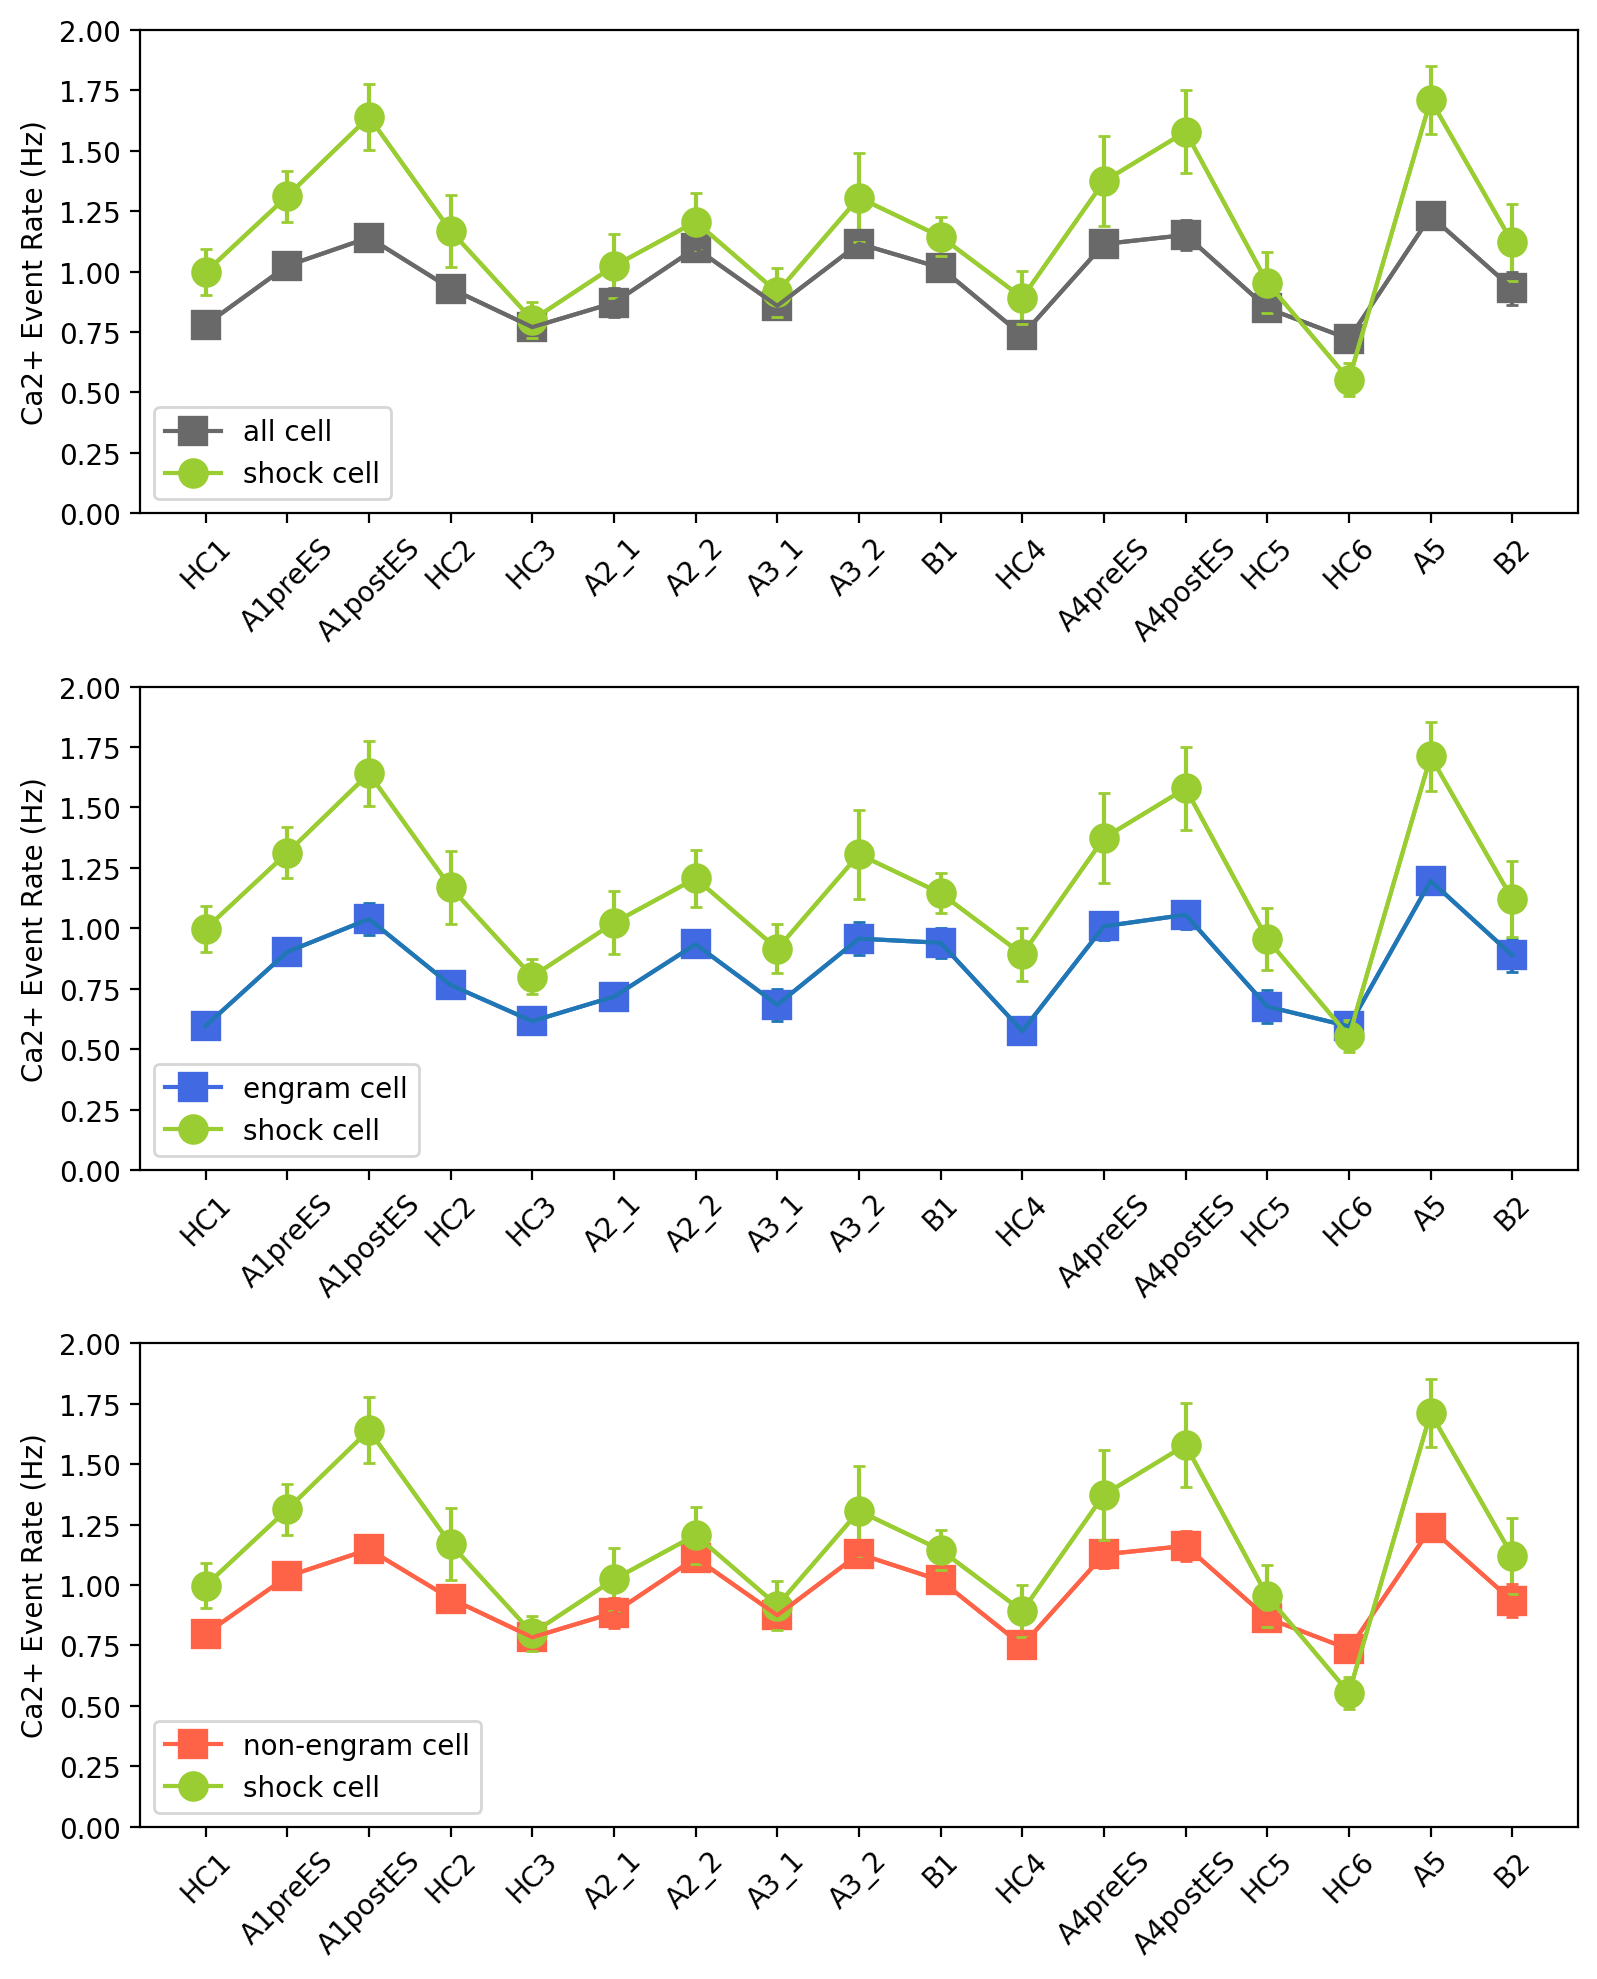

In [22]:
x = all_event_rate_df.columns
y = all_event_rate_df.mean()
error = all_event_rate_df.sem()

engram_x = engram_event_rate_df.columns
engram_y = engram_event_rate_df.mean()
engram_err = engram_event_rate_df.sem()

non_engram_x = non_engram_event_rate_df.columns
non_engram_y = non_engram_event_rate_df.mean()
non_engram_err = non_engram_event_rate_df.sem()

shock_cell_x = event_rate_for_2sd_shock_cells.columns
shock_cell_y = event_rate_for_2sd_shock_cells.mean()
shock_cell_err = event_rate_for_2sd_shock_cells.sem()

fig, axes = plt.subplots(3, figsize=(8, 10), dpi=200, tight_layout=True)

axes[0].errorbar(x, y, yerr=error, capsize=2, color='dimgray')
axes[0].plot(x, y, marker="s", markersize=8, markeredgewidth=3, label='all cell', color='dimgray')

axes[0].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[0].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[0].set_ylim(0, 2.0)
axes[0].set_ylabel('Ca2+ Event Rate (Hz)')
axes[0].legend(loc='lower left')
axes[0].set_xticklabels(x, rotation=45)

axes[1].errorbar(engram_x, engram_y, yerr=engram_err, capsize=2)
axes[1].plot(engram_x, engram_y, marker="s", markersize=8, markeredgewidth=3, label='engram cell', color='royalblue')

axes[1].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[1].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[1].set_ylim(0, 2.0)
axes[1].set_ylabel('Ca2+ Event Rate (Hz)')
axes[1].legend(loc='lower left')
axes[1].set_xticklabels(x, rotation=45)

axes[2].errorbar(non_engram_x, non_engram_y, yerr=non_engram_err, capsize=2, color='tomato')
axes[2].plot(non_engram_x, non_engram_y, marker="s", markersize=8, markeredgewidth=3, label='non-engram cell', color='tomato')

axes[2].errorbar(shock_cell_x, shock_cell_y, yerr=shock_cell_err, capsize=2, color='yellowgreen')
axes[2].plot(shock_cell_x, shock_cell_y, marker="o", markersize=8, markeredgewidth=3, label='shock cell', color='yellowgreen')

axes[2].set_ylim(0, 2.0)
axes[2].set_ylabel('Ca2+ Event Rate (Hz)')
axes[2].legend(loc='lower left')
axes[2].set_xticklabels(x, rotation=45)

plt.xticks(rotation=45)

plt.show()

In [13]:
event_rate_for_2sd_shock_cells.mean()

HC1         0.997649
A1preES     1.312696
A1postES    1.640702
HC2         1.169136
HC3         0.800220
A2_1        1.023045
A2_2        1.206657
A3_1        0.914936
A3_2        1.306251
B1          1.145106
HC4         0.891966
A4preES     1.373764
A4postES    1.579093
HC5         0.954559
HC6         0.553268
A5          1.711034
B2          1.120630
dtype: float64

In [14]:
event_rate_for_2sd_shock_cells.to_csv('./resources/event_rates/oasis_by_cells/2sd_shock_cell_event_rates.csv')